In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


In [2]:
data=pd.read_csv('/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv')

In [3]:
data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [4]:
data.shape

(900000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [6]:
data.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656
std,9.357863e+06,1.252583,17.873553,5.963821
min,1.000000e+00,0.000000,-3.000000,-1.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [7]:
data.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [8]:
data['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

In [9]:
data.isnull().sum()/len(data)

user_id         0.000000
book_id         0.000000
review_id       0.000000
rating          0.000000
review_text     0.000000
date_added      0.000000
date_updated    0.000000
read_at         0.101962
started_at      0.304774
n_votes         0.000000
n_comments      0.000000
dtype: float64

# Reducing data

In [10]:
rate0=data[data['rating']==0]
rate1=data[data['rating']==1]
rate2=data[data['rating']==2]
rate3=data[data['rating']==3]
rate4=data[data['rating']==4]
rate5=data[data['rating']==5]

In [11]:
rate0.shape, rate1.shape,rate2.shape,rate3.shape,rate4.shape,rate5.shape

((30988, 11),
 (28718, 11),
 (72627, 11),
 (188972, 11),
 (313688, 11),
 (265007, 11))

In [12]:
rate0=data[:(int)(rate0.shape[0]/100)]
rate1=data[:(int)(rate1.shape[0]/100)]
rate2=data[:(int)(rate2.shape[0]/100)]
rate3=data[:(int)(rate3.shape[0]/100)]
rate4=data[:(int)(rate4.shape[0]/100)]
rate5=data[:(int)(rate5.shape[0]/100)]

In [13]:
rate0.shape, rate1.shape,rate2.shape,rate3.shape,rate4.shape,rate5.shape

((309, 11), (287, 11), (726, 11), (1889, 11), (3136, 11), (2650, 11))

In [14]:
data=pd.concat([rate0,rate1,rate2,rate3,rate4,rate5],axis=0)
data=data.sample(frac=1)

In [15]:
data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
804,8e1db93d364acf3893ce998ebb8d57fc,6148028,65506855d04f2c96dab2304a63789301,5,Perfect \n perfect \n just perfect \n EVERYONE...,Mon Jun 04 22:25:55 -0700 2012,Sun Nov 10 04:38:57 -0800 2013,Sat Jan 01 00:00:00 -0800 2011,NaN,0,0
2126,792500e85277fa7ada535de23e7eb4c3,127459,af380030173cad4ef97405adee06ba5d,2,Not nearly as strong as the first two books. O...,Wed Jun 06 10:20:59 -0700 2012,Mon Aug 11 20:29:25 -0700 2014,NaN,NaN,0,0
1736,7ac68d284be15768081bd3e86a1431c9,20757521,66d031273aa88f363985d731c90d38a7,5,"First, allow me to remind everyone that I AM A...",Sat Oct 04 19:55:44 -0700 2014,Wed Oct 08 19:43:58 -0700 2014,Tue Oct 07 00:00:00 -0700 2014,Sat Oct 04 00:00:00 -0700 2014,1,0
263,01ec1a320ffded6b2dd47833f2c8e4fb,25802884,f2bdb548e33667f8e5af4948e9c9d63b,4,4.5 Stars \n Classic enemies-to-lovers romance...,Fri Jun 26 23:23:47 -0700 2015,Thu Sep 10 14:44:42 -0700 2015,Mon Sep 07 00:00:00 -0700 2015,Sat Sep 05 00:00:00 -0700 2015,21,0
750,2f6af21d14c83a5df6cdcef5e6af0b3e,17572903,7b3bd4c777160087515c1f1bb77462de,3,This book has highs and lows--stars are the av...,Fri Jan 24 08:06:23 -0800 2014,Sun Jan 26 15:25:35 -0800 2014,Sat Jan 25 00:00:00 -0800 2014,Fri Jan 24 00:00:00 -0800 2014,0,0


In [16]:
data.shape

(8997, 11)

# DataCleaning

In [17]:
#remove hashtags
data['review_text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

In [18]:
#remove mentions
data['review_text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

In [19]:
#remove urls
data['review_text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

In [20]:
#converting into lower case

data['review_text']=data['review_text'].str.lower()

In [21]:
#stopwords removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['review_text'] = data['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Text Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
x=data['review_text']
y=data['rating']

In [24]:
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
data= pd.DataFrame(denselist1, columns=feature_names1)

In [25]:
data.head()

,ability,able,about,absolutely,accept,across,act,action,actions,actually,...,ya,yeah,year,years,yes,yet,you,young,younger,zach
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.00000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.00000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.030959,...,0.0,0.044776,0.0,0.028,0.033143,0.000000,0.02637,0.0,0.044776,0.0
3,0.0,0.0,0.0,0.089574,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000,0.000000,0.105757,0.00000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.00000,0.0,0.000000,0.0


# Train Test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=2)

# Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logclf=LogisticRegression().fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
logpred=logclf.predict(x_test)
logpred

array([5, 4, 5, ..., 4, 5, 4])

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
logacc=accuracy_score(y_test,logpred)
logacc

0.7144444444444444

# Desicion Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
treeclf=DecisionTreeClassifier(criterion='gini',max_depth=100).fit(x_train,y_train)

In [35]:
treepred=treeclf.predict(x_test)
treepred

array([5, 4, 5, ..., 4, 5, 5])

In [36]:
treeacc=accuracy_score(y_test,treepred)
treeacc

0.9355555555555556

# Random forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfcclf=RandomForestClassifier(n_estimators=1000,max_features='log2').fit(x_train,y_train)

In [39]:
rfcpred=rfcclf.predict(x_test)
rfcpred

array([5, 4, 5, ..., 4, 5, 5])

In [40]:
rfcacc=rfcclf.score(x_test,y_test)
rfcacc

0.9538888888888889

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knnclf=KNeighborsClassifier(metric='manhattan',weights='distance',n_neighbors=10).fit(x_train,y_train)

In [43]:
knnacc=knnclf.score(x_test,y_test)
knnacc

0.9111111111111111

# linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linclf=LinearRegression().fit(x_train,y_train)

In [46]:
linacc=linclf.score(x_test,y_test)
linacc

0.4762691011979646

# Evaluation

In [47]:
acc=[];
acc.append(linacc*100)
acc.append(logacc*100)
acc.append(treeacc*100)
acc.append(rfcacc*100)
acc.append(knnacc*100)
acc

[47.62691011979646,
 71.44444444444444,
 93.55555555555556,
 95.38888888888889,
 91.11111111111111]

In [48]:
model=['Linear Regression','Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbors']
data={'model':model,'accuracy':acc}
compare_models=pd.DataFrame(data)
compare_models

,model,accuracy
0,Linear Regression,47.626910
1,Logistic Regression,71.444444
2,Decision Tree,93.555556
3,Random Forest,95.388889
4,K Nearest Neighbors,91.111111


<BarContainer object of 5 artists>

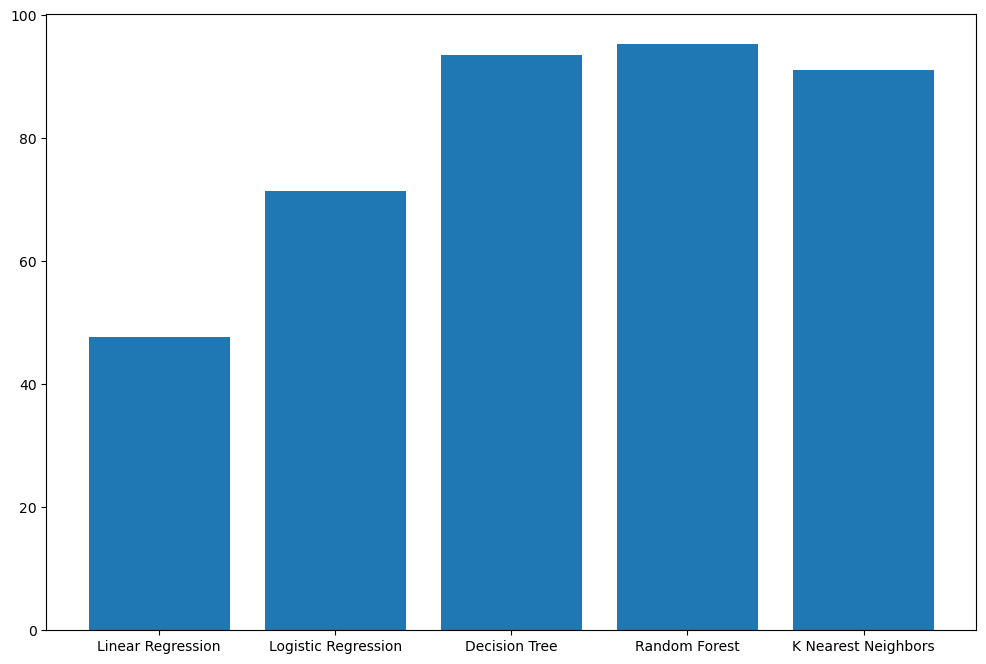

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(model,acc)